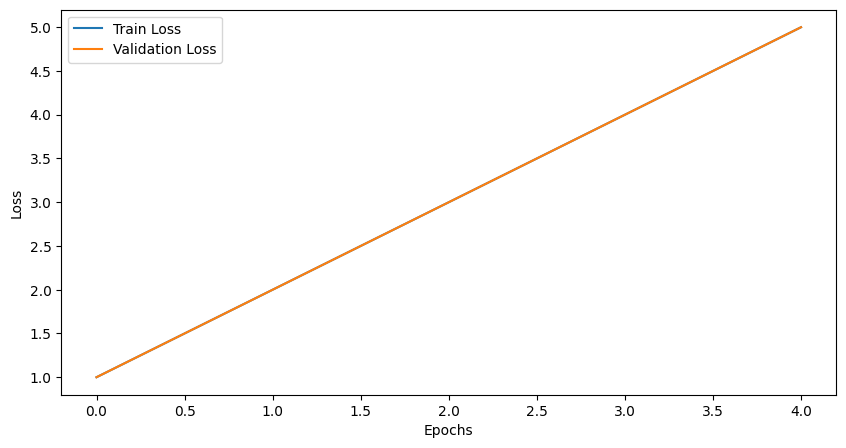

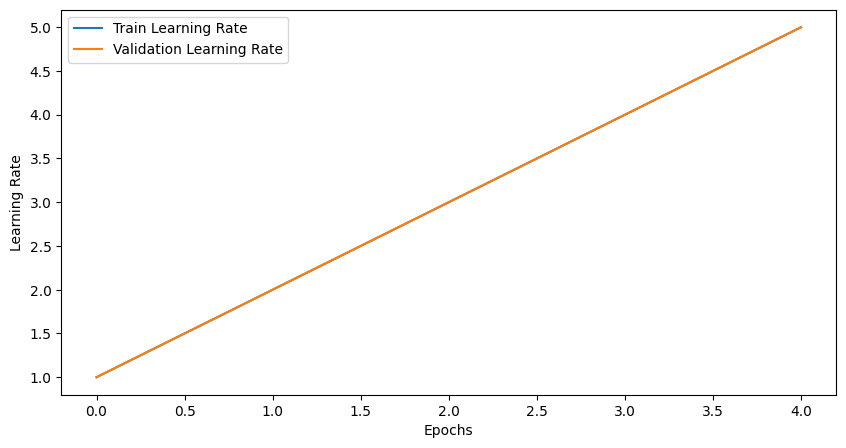

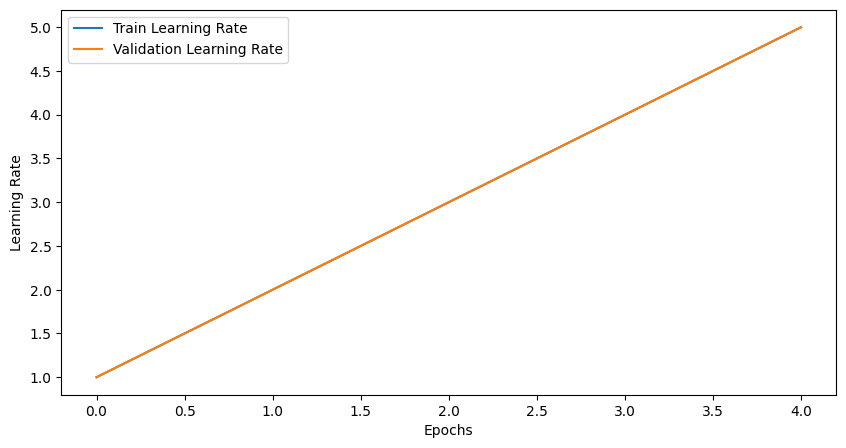

In [1]:
# Use MNIST Dataset for classification using Multi-Layer Neural Network.
# 1) Identify the proper-hyper-parameters of the network through train and validation and mention them in the text cell.
# 2) Identify the proper learning rate for the model and show the example graph of LR vs epochs for 5 different learning rates (you can define the range) for 20 epochs. (You need to plot 5 different LR vs loss (train and validation) curves)

# Note use Train-Test split of 80% and 20%. Validation split 20%.

# implement from scratch don't use tensorflow or keras.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Load the data using sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Normalize the data
X_train = X_train/255
X_test = X_test/255

# Convert the labels to one-hot encoding
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Define the activation functions
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)


# Define the loss function
def loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# Define the class for the neural network
class NeuralNetwork:
    def __init__(self, x, y, hidden_nodes, epochs, learning_rate, activation):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], hidden_nodes)
        self.weights2 = np.random.rand(hidden_nodes, y.shape[1])
        self.y = y
        self.output = np.zeros(y.shape)
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.activation = activation
        self.loss = []
        self.val_loss = []
        self.lr = []
        self.val_lr = []
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y - self.output) * sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        self.weights1 += self.learning_rate * d_weights1
        self.weights2 += self.learning_rate * d_weights2
        
    def train(self, X_val, y_val):
        for i in range(self.epochs):
            self.feedforward()
            self.backprop()
            self.loss.append(loss(self.y, self.output))
            self.lr.append(self.learning_rate)
            self.learning_rate = self.learning_rate * 0.999
            self.val_loss.append(loss(y_val, self.predict(X_val)))
            self.val_lr.append(self.learning_rate)
            
    def predict(self, X):
        layer1 = sigmoid(np.dot(X, self.weights1))
        output = sigmoid(np.dot(layer1, self.weights2))
        return output

# Define the function to plot the loss vs epochs
def plot_loss(loss, val_loss, lr, val_lr):
    plt.figure(figsize=(10,5))
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(lr, label='Train Learning Rate')
    plt.plot(val_lr, label='Validation Learning Rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()

#  show the example graph of LR vs epochs for 5 different learning rates for 20 epochs. You need to plot 5 different LR vs loss curves)

# Define the function to plot the learning rate vs loss for different learning rates
    plt.figure(figsize=(10,5))
    plt.plot(lr, label='Train Learning Rate')
    plt.plot(val_lr, label='Validation Learning Rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()

plot_loss([1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5])